In [1]:
import os.path
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Data-loading

In [2]:
def onehot(label):

    le = preprocessing.LabelEncoder()
    labels_classes = le.fit_transform(label)
    labels_classes = pd.Series(labels_classes, name='Label')
    return labels_classes

In [3]:
# Dataset location
image_dir = Path('C:\MLAI\Coursework\IVC\Coursework\marvel')


# Storing path and label values
filepaths = list(image_dir.glob(r'train\**\*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


# Creating dataframe object
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = onehot(labels)
image_df = pd.concat([filepaths, labels], axis=1)

## Perturbations

In [4]:
# def apply_perturb(input_img,dictionary,perturb,start,stop,step):
    
#     if not list(dictionary):
#         for i in range(start,stop,step):
#             dictionary[str(i)] = []

#     for i in range(start,stop,step):
#         dictionary[str(i)].append(perturb(input_img,i))

#     return dictionary

In [4]:
def apply_perturb(images,dictionary,perturb,start,stop,step):

    for k in range(len(images)):

        input_img = cv2.imread(images[k],0)
        
        if not list(dictionary):
            for i in range(start,stop,step):
                dictionary[str(i)] = []

        for i in range(start,stop,step):
            dictionary[str(i)].append(perturb(input_img = input_img,sd =i))

    

    return dictionary

### Visualise

In [5]:
def plot_imgs(dictionary,image_index =0):

    fig = plt.figure(figsize=(24,24))
    rows, cols = 3,4

    index = list(dictionary.keys())

    for j in range(0, len(index)):

        fig.add_subplot(rows, cols, j+1)
        plt.imshow(dictionary[index[j]][image_index],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

### Gaussian

In [6]:
def gaussian_noise(input_img,sd):
    
    
    # create gaussian noise
    x, y = input_img.shape
    mean = 0
    var = 0.01
    sigma = sd
    n = np.random.normal(loc=mean, 
                         scale=sigma, 
                         size=(x,y))
    
    g = input_img+n
    
    return g

In [7]:
gaussian_image = {}
k3 = apply_perturb(image_df['Filepath'][:5],gaussian_image,gaussian_noise,0,19,2)

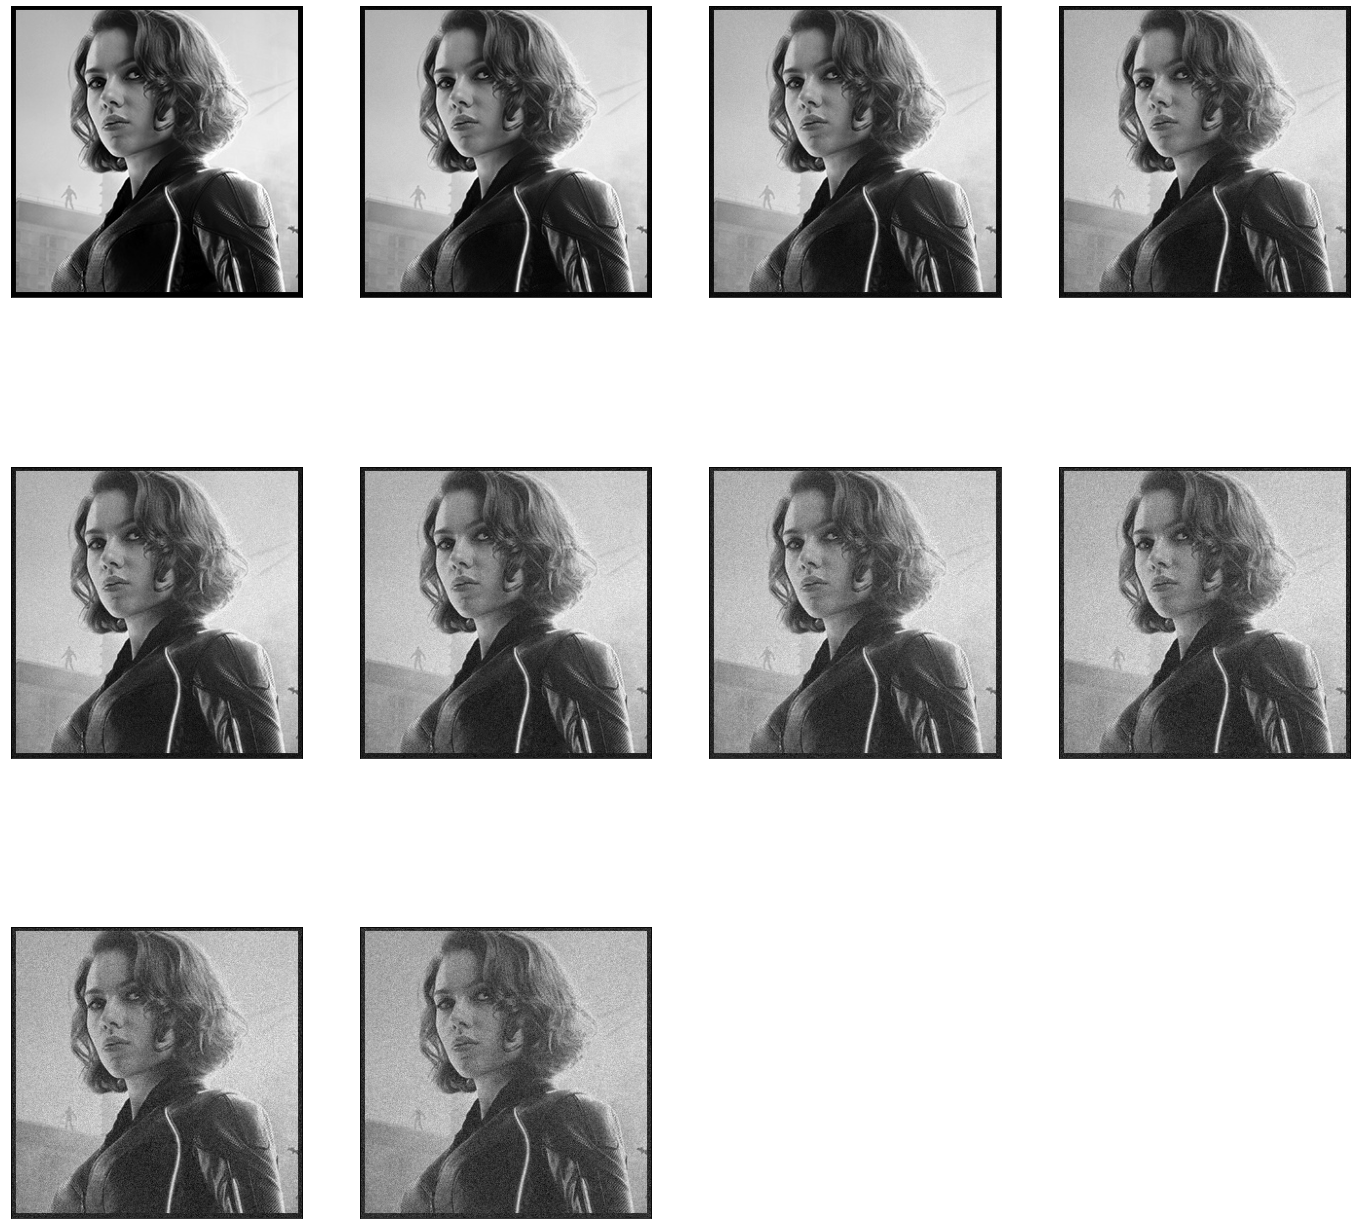

In [8]:
plot_imgs(gaussian_image,3)

### Gaussian Blur


In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
def gaussian_blurring(input_img,sd):

    for i in range(sd):

       input_img =  gaussian_filter(input_img,sigma=1)


    return input_img

In [ ]:
gaussian_blur = {}
k4 = apply_perturb(image_df['Filepath'][:5],gaussian_blur,gaussian_blurring,0,10,1)

In [ ]:
plot_imgs(gaussian_blur,0)

### Image Contrast

In [9]:
trial= cv2.imread(r'C:\MLAI\Coursework\IVC\Coursework\marvel\marvel\train\black widow\pic_001.jpg',0)

In [22]:
def contrast_incr(input_img,sd):

    fact = [1.0,1.01,1.02,1.03,1.04,1.05,1.1,1.15,1.20,1.25]

    return np.clip(input_img*fact[sd],0,255).astype(int)

In [23]:
image_contrast_incr = {}
k4 = apply_perturb(image_df['Filepath'][:1],image_contrast_incr,contrast_incr,0,10,1)

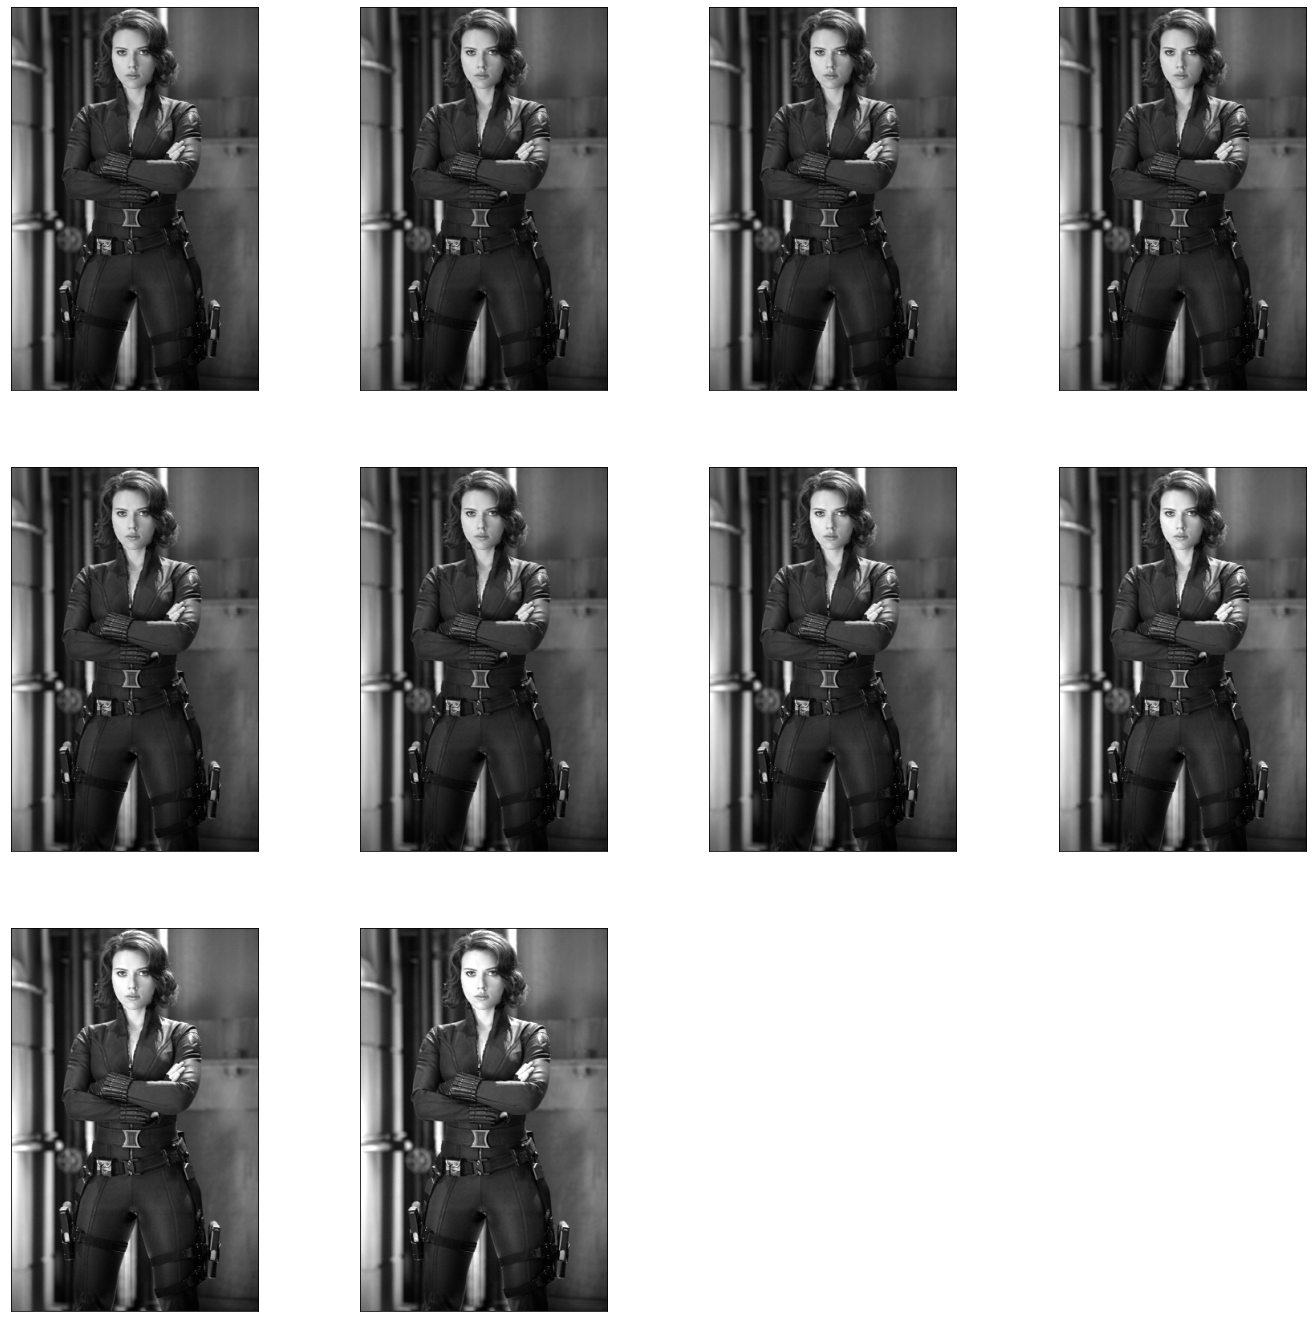

In [25]:
plot_imgs(k4,0)

### Image Contrast Decrease

In [ ]:
def contrast_decr(input_img,sd):

    fact = [1.0, 0.95, 0.90, 0.85, 0.80, 0.60, 0.40, 0.30, 0.20, 0.10]

    return input_img*fact[sd]

In [ ]:
image_contrast_decr = {}
k5 = apply_perturb(image_df['Filepath'][:1],image_contrast_decr,contrast_decr,0,10,1)

In [ ]:
k5['9'][-1][-3].shape

### Image Brightness increase

In [ ]:
def image_bright_incr(input_img,sd):

    fact = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

    return np.clip(input_img+fact[sd],0,255).astype(int)

In [ ]:
bright_incr = {}
k6 = apply_perturb(image_df['Filepath'][:1],bright_incr,image_bright_incr,0,10,1)

In [ ]:
plot_imgs(k6,0)

### Image Brightness Decrease

In [ ]:
def image_bright_decr(input_img,sd):

    fact = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

    return np.clip(input_img-fact[sd],0,255).astype(int)

In [ ]:
bright_decr = {}
k7 = apply_perturb(image_df['Filepath'][:1],bright_decr,image_bright_decr,0,10,1)

In [ ]:
plot_imgs(k7,0)

### Occulsion

In [ ]:
def square_reg(input_image,sd):

    image_size = input_image.shape
    portion_size = (sd, sd)

    x1 = random.randint(0, image_size[0]-portion_size[0]-1)
    y1 = random.randint(0, image_size[1]-portion_size[1]-1)

    x2, y2 = x1+portion_size[0]-1, y1+portion_size[1]-1

    return (x1,y1),(x2,y2)


In [ ]:
def occulsion(input_img,sd):

    fact = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
    coord1,coord2 = square_reg(input_img,fact[sd])
    img = cv2.rectangle(input_img,coord1,coord2, (0,0,0), thickness=-1)

    return img

In [ ]:
occulsion_incr = {}
k8 = apply_perturb(image_df['Filepath'][:1],occulsion_incr,occulsion,0,10,1)

In [ ]:
plot_imgs(k8,0)

### Salt&Pepper

In [ ]:
import skimage

In [ ]:
def saltandpepper(input_img,sd):

    fact = [0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18]

    return skimage.util.random_noise(input_img, mode='s&p', seed=None, clip=True,amount = fact[sd])

In [ ]:
salt_and_pepper = {}
k8 = apply_perturb(image_df['Filepath'][:1],salt_and_pepper,saltandpepper,0,10,1)

In [ ]:
plot_imgs(k8,0)